## Load a dataset

In [ ]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar

--2021-12-24 18:41:25--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  31.3MB/s    in 62s     

2021-12-24 18:42:27 (30.9 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]

--2021-12-24 18:42:27--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/x-tar]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[========

In [ ]:
!pip install colab_ssh --upgrade

In [ ]:
from colab_ssh import launch_ssh_cloudflared, init_git_cloudflared


In [ ]:
launch_ssh_cloudflared(password="velando3000")

In [ ]:
repository_url="https://github.com/chiconasa3000/ObjectDetection"
init_git_cloudflared(repository_url)

Successfully cloned the repository in ./ObjectDetection


### Go on Coding...

Es bueno ejecutar el python fuera del repositorio

In [ ]:
!python3 ObjectDetection/train_model.py

2021-12-24 04:27:46.573527: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1224 04:27:46.576933 140408395208576 mirrored_strategy.py:376] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 4000
I1224 04:27:46.582081 140408395208576 config_util.py:552] Maybe overwriting train_steps: 4000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1224 04:27:46.582267 140408395208576 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W1224 04:27:46.614742 140408395208576 deprecation.py:347] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experiment

##### Copy Model Config to Training Folder


In [ ]:
!python3 ObjectDetection/train_model.py

W1224 04:36:38.276725 139634165131136 model_lib_v2.py:1090] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I1224 04:36:38.276977 139634165131136 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1224 04:36:38.277155 139634165131136 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I1224 04:36:38.277315 139634165131136 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W1224 04:36:38.277556 139634165131136 model_lib_v2.py:1111] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-12-24 04:36:38.866674: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original confi

In [ ]:
#Cargar rutas y archivos
#ToDo mandar a un archivo externo como config
import os

CUSTOM_MODEL_NAME = 'my_ssd_mobnet'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME),
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'),
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'),
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME),
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [ ]:
#Load Train Model from checkpoint
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
import cv2
import numpy as np
from matplotlib import pyplot as plt
#Cargando el modelo
configs = config_util.get_configs_from_pipeline_file(files["PIPELINE_CONFIG"])
#cargar el modelo mediante con el archivo de configuracion ya actualizada
detection_model = model_builder.build(model_config=configs["model"], is_training=False)

#Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
#cargar desde el ultimo checkpoint resulto el entrenamiento
ckpt.restore(os.path.join(paths["CHECKPOINT_PATH"], "ckpt-5")).expect_partial()

@tf.function
def detect_fn(image):
  image, shapes = detection_model.preprocess(image)
  prediction_dict = detection_model.predict(image, shapes)
  detections = detection_model.postprocess(prediction_dict, shapes)
  return detections

print("Modelo cargado exitosamente")

Modelo cargado exitosamente


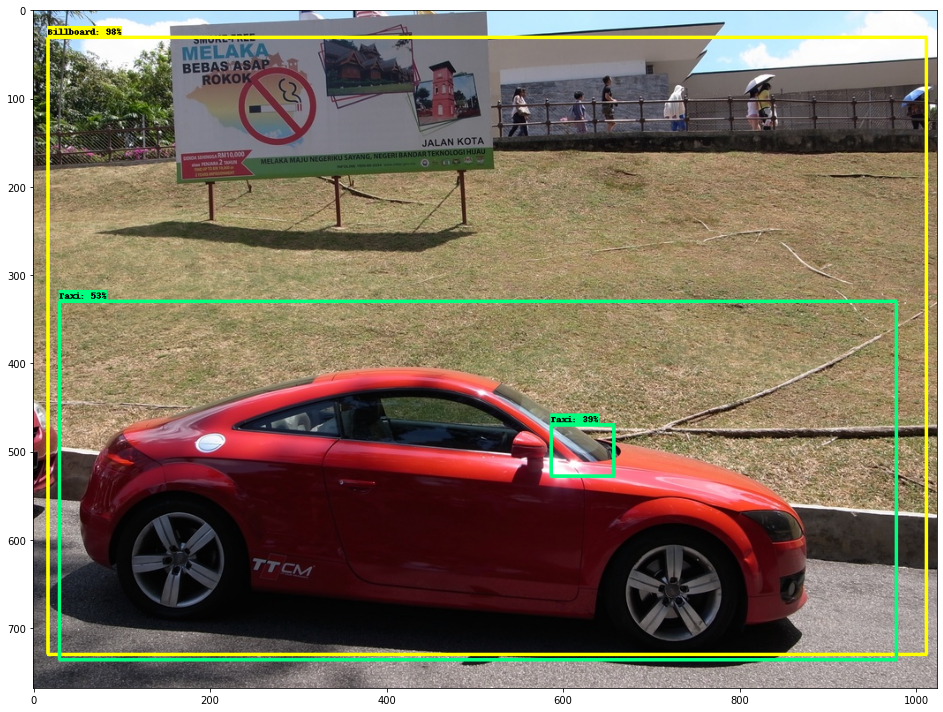

In [ ]:
import glob
from object_detection.utils import visualization_utils as viz_utils
img_test = np.array(np.sort(glob.glob("Tensorflow/workspace/images/test/*.jpg")))
#Por el matplolib cargamos en la celda

#lista de clases para los textos en los bb
category_index = label_map_util.create_category_index_from_labelmap(files["LABELMAP"])

for imgtmp in img_test[:1]:
  imgname = str(imgtmp).split("/")[4]
  #imagen de prueba
  IMAGE_PATH = os.path.join(paths["IMAGE_PATH"], "test", imgname)

  #Lectura de la imagen
  img = cv2.imread(IMAGE_PATH)
  image_np = np.array(img)

  #convertir a tensor
  input_tensor = tf.convert_to_tensor(np.expand_dims(image_np,0),dtype=tf.float32)
  #usar el modelo para predecir
  detections = detect_fn(input_tensor)
  num_detections = int(detections.pop("num_detections"))

  detections = {key:value[0, :num_detections].numpy() for key, value in detections.items()}
  detections["num_detections"] = num_detections

  #Visualizar
  #detections_classes should be ints
  detections["detection_classes"] = detections["detection_classes"].astype(np.int64)

  label_id_offset = 1
  image_np_with_detections = image_np.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections["detection_boxes"],
    detections["detection_classes"]+label_id_offset,
    detections["detection_scores"],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=5,
    min_score_thresh=.2,
    agnostic_mode=False
  )

  fig, ax = plt.subplots(figsize=(18, 10))
  ax.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  plt.show()

In [ ]:
!cp Roboto-BoldItalic.ttf /usr/share/fonts/truetype/roboto/

In [ ]:
!ls Tensorflow/workspace/images/train | wc -l 

84


In [ ]:
!ls Tensorflow/workspace/images/test | wc -l 

36


In [ ]:
!tensorboard --logdir="Tensorflow/workspace/models/my_ssd_mobnet/train/."


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.7.0 at http://localhost:6006/ (Press CTRL+C to quit)
